# Исследование данных о российском кинопрокате



Данное исследование направлено на изучение проката кино в России. В нем будут рассмотрены особенности российского кинорынка, его тренды. Особенно подробно будут рассмотрены фильмы, которые были финансово поддержаны государством, их окупаемость, востребованность зрителями. Данные для этой работы были предоставлены Министерством культуры Российской Федерации и содержат, как общу информацию о прокате фильмов, так и информацию об объемах поддержки со стороны государства.


### Загрузка данных


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data_old_1 = pd.read_csv('/datasets/mkrf_movies.csv')
data_old_2 = pd.read_csv('/datasets/mkrf_shows.csv')
data_old_1.info()
data_old_1.head(10)
data_old_2.info()
data_old_2.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
5,111000119,4.293650e+06
6,111000212,2.000000e+02
7,111000216,3.555670e+05
8,111000313,7.100000e+02
9,111000314,1.607970e+06


In [2]:
data_old_1['puNumber'].unique()

array(['221048915', '111013716', '221038416', ..., '124010819',
       '124010619', '124010719'], dtype=object)

In [3]:
data_old_1.loc[data_old_1['puNumber']=='нет']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Поскольку в списке фильмов был обнаружен фильм без номера прокатного удостоверения, чтобы дальше можно было объединять таблицы, используя его в качестве ключа, меняем "нет" на 0 и тип данных  в столбце на числовой.

In [4]:
data_old_1['puNumber']=data_old_1['puNumber'].replace('нет','0')

In [5]:
data_old_1['puNumber']=data_old_1['puNumber'].astype(int)
data_old_1['puNumber'].unique()

array([221048915, 111013716, 221038416, ..., 124010819, 124010619,
       124010719])

In [6]:
data_old= data_old_1.merge(data_old_2, on='puNumber', how='left')
print(data_old.head(5))

                  title   puNumber           show_start_date            type  \
0      Открытый простор  221048915  2015-11-27T12:00:00.000Z  Художественный   
1  Особо важное задание  111013716  2016-09-13T12:00:00.000Z  Художественный   
2          Особо опасен  221038416  2016-10-10T12:00:00.000Z  Художественный   
3          Особо опасен  221026916  2016-06-10T12:00:00.000Z  Художественный   
4          Особо опасен  221030815  2015-07-29T12:00:00.000Z  Художественный   

                                         film_studio production_country  \
0  Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...                США   
1                              Киностудия "Мосфильм"               СССР   
2  Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...                США   
3  Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...                США   
4  Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...                США   

            director                                           produ

###  Предобработка данных

#### Проверка типа данных

In [7]:
data=data_old
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [8]:
data['show_start_date']=pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [9]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [10]:
incorrect_r = data[data['ratings'].str.contains('[^0-9.]').fillna(False)]
incorrect_r

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
259,Прошлое,221030715,2015-07-29 12:00:00,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,99%,"ужасы,триллер,драма",NaN
811,От винта!,114000212,2012-08-06 12:00:00,Анимационный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,О.Лопато,"Г.Нерсисян, А.Манасарян, А.Нерсесян",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,28%,"детский,приключения,комедия",1.740000e+03
1053,Песочный человек,121029212,2012-11-29 12:00:00,Художественный,Спотлайт Медиа Продакшн,Швейцария,Питер Луизи,"Дэвид Луизи, Питер Луизи",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,97%,"ужасы,фантастика,фэнтези",NaN
1341,Сказка о добре и Вре,111008913,2013-11-15 12:00:00,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,99%,"триллер,драма,детектив",NaN
1805,Спираль.,111001014,2014-01-30 12:00:00,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,99%,"аниме,мультфильм,ужасы",4.295000e+03
1874,Короткие истории о любви 2,121002615,2015-02-13 12:00:00,Художественный,"Кавиар, Курт 13, СтритЛайт Филмз, Нэйер Дойче ...",Нидерланды - США - Германия - Канада - Франция...,"Мэтью Аувро, Лео Брайдл, Бен Бренд, Ден Кларк,...","Мэри Пэт Бентел, Бен Бренд, Сиара Гиллан, Джор...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,83%,NaN,1.429859e+06
1899,Золушка /По сказке Шарля Перро/. Холодное торж...,121003615,2015-02-27 12:00:00,Художественный,"Женр Филмз, Уолт Дисней Пикчерз",США,Кеннет Брана,"Дэвид Бэррон, Саймон Кинберг, Эллисон Ширмур",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,64%,"мюзикл,фэнтези,мелодрама",5.287326e+08
2126,Поездка к матери,111002015,2015-03-02 12:00:00,Художественный,"ЗАО ""Киностудия ""М""-Фильм""",Россия,М.Косырев-Нестеров,М.Косырев-Нестеров,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,91%,"драма,семейный",0.000000e+00
2146,Главный,111003415,2015-03-27 12:00:00,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0.0,10000000.0,40000000.0,Министерство культуры,94%,"фантастика,боевик,комедия",3.347500e+05
2438,Самый рыжий Лис,111012715,2015-07-30 12:00:00,Художественный,"ООО ""Продюсерский центр ""Ленфильм""",Россия,А.Стреляная,"А.Котелевский, Э.Пичугин",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,62%,"фэнтези,семейный",NaN


In [11]:
data.loc[incorrect_r.index, 'ratings'] = incorrect_r['ratings'].str[0] + '.' + incorrect_r['ratings'].str[1]
data['ratings'] = pd.to_numeric(data['ratings'])
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

#### Изучение пропусков

In [12]:
null_data=data.isna().sum()
print(null_data)

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64


[Text(0.5, 0, 'Год премьеры фильма'),
 Text(0, 0.5, 'Кол-во фильмов'),
 Text(0.5, 1.0, 'Распределение выпущенных фильмов по годам')]

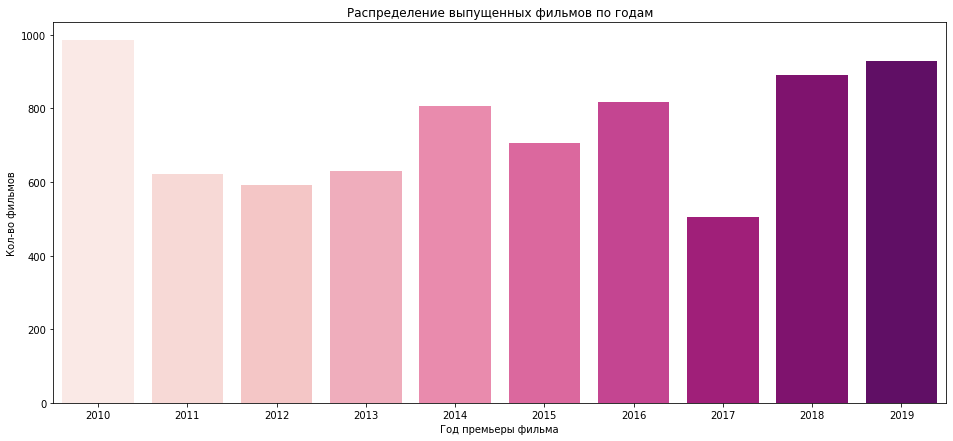

In [13]:
null_data['year']=data['show_start_date'].dt.year
fig = plt.gcf()
fig.set_size_inches(16, 7)
graph_1=sns.countplot(x='year',data=null_data, palette="RdPu")
graph_1.set(xlabel ="Год премьеры фильма", ylabel = "Кол-во фильмов", 
            title ='Распределение выпущенных фильмов по годам')


Судя по графику нет никакой зависимости между пропусками в данных и годами.

In [14]:
data['year']=data['show_start_date'].dt.year
data['year'].loc[data['box_office'].isna()].unique()

array([2015, 2016, 2014, 2013, 2012, 2017, 2010, 2011, 2018, 2019])

Пропуски в столбцах с режиссером, продюссером, студией, страной производства, рейтингом, жанром и сборами заполнить, например, средним или медианным значением нельзя, так что оставляем их. Фильмы с пропусками в  столбцах с размерами возвратного и невозвратного бюджета, а также источника финансирования это фильмы без такой поддержки, заполнять такие пропуски не нужно.

#### Изучение дубликатов

In [15]:
print('Количество дубликатов:', data.duplicated().sum())

Количество дубликатов: 0


In [16]:
print(data.nunique())

title                    6772
puNumber                 7484
show_start_date          1965
type                        8
film_studio              5490
production_country        950
director                 4811
producer                 5349
age_restriction             5
refundable_support         34
nonrefundable_support      75
budget                    290
financing_source            3
ratings                    84
genres                    742
box_office               2938
year                       10
dtype: int64


In [17]:
data.loc[data['puNumber'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN,2010
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN,2010
5067,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN,2010
5068,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN,2010


In [18]:
data.loc[data['title'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03 12:00:00,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.1,"драма,спорт",NaN,2015
26,Оружейный барон,221012515,2015-04-03 12:00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.7,"боевик,драма,криминал",NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07 12:00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.5,"триллер,детектив,криминал",NaN,2019
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"комедия,приключения,детектив",NaN,2019
7438,Зверь,121035919,2019-12-05 12:00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.5,"триллер,драма",175003.51,2019
7450,В тихом омуте,121036919,2019-12-09 12:00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"триллер,криминал,детектив",NaN,2019



Дубликаты  в номерах прокатных удостоверений в целом некритичны, они могли возникнуть случайно, например, из-за ручного ввода данных, кто-то допустил опечатку в номере. Такое небольшое количество дубликатов не может значительно исказить данные, так что не будем их трогать. Дубликаты в названиях фильмов тоже дальнейшее исследование сильно не искажают, возможно это один и тот же фильм, как в случае с "Особо опасен", который видимо выходил в прокат по нескольким разным прокатным удостоверениям (конкретно этот фильм вообще вышел в 2008 году, судя по всему здесь номера его повторного проката в кинотеатрах). Или возможно такое, что абсолютно разные фильмы имели одинаковое название, это так же не должно как-то повлиять на результаты исследования.


#### Изучение категориальных значений

In [19]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [20]:
data['type']=data['type'].str.strip()

In [21]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [22]:
data['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [23]:
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

Мне кажется, что мало что можно сделать с данным столбцом, так как у нас нет данных о том, по какому приципу он  заполнялся. Мы не знаем важен ли порядок стран в строках, если да, то, что он означает. Была ли первая страна в списке той, в которой снималась большая часть фильма или, например, возможно ли такое, что компания из первой страны в списке профинансировала и сняла фильм, но съемки проходили только на территории других стран. А может таких стран-производителей у фильма несколько, а сам он фактически снимался только в одной из них. Вариантов еще может быть много, мне кажется, что данный столбец можно оставить без изменений как минимум по этой причине, а таже потому что дальше он в исследовании так и не использовался.

#### Проверка количественных значений


In [24]:
budget_check=data[data['budget'] <= 0]
budget_check

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
2053,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07,2014
2058,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08,2015
2472,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08,2015
2532,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07,2015
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08,2015
2684,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06,2015
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07,2015
2874,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07,2016
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07,2016
3565,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09,2016


In [25]:
data['support_per']=(data['refundable_support']+data['nonrefundable_support'])/data['budget']
data['support_per'].median()

0.6140376284219444

In [26]:
data.loc[budget_check.index, 'budget']= (data.loc[budget_check.index, 'refundable_support'] + data.loc[budget_check.index, 'nonrefundable_support']) / data['support_per'].median()
data.loc[budget_check.index]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,support_per
2053,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,3.745699e+07,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07,2014,inf
2058,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,1.221424e+08,Фонд кино,6.6,драма,4.461635e+08,2015,inf
2472,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,1.302852e+08,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08,2015,inf
2532,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,3.257129e+07,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07,2015,inf
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,2.605704e+08,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08,2015,inf
2684,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,9.608532e+07,Фонд кино,6.3,"комедия,драма",1.957739e+06,2015,inf
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,5.699976e+07,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07,2015,inf
2874,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,9.771388e+06,Министерство культуры,4.3,комедия,1.536293e+07,2016,inf
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,1.139995e+08,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07,2016,inf
3565,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,4.071412e+08,Фонд кино,5.6,фантастика,1.038321e+09,2016,inf


#### Добавление доп столбцов





In [27]:
data['main_director'] = data['director'].str.replace(',.*', '', regex=True)

In [28]:
data['main_genre'] = data['genres'].str.replace(',.*', '', regex=True)

### Исследовательский анализ данных


In [29]:
known_date=data['box_office'][data['box_office'].notna()]
print('Доля фильмов с указанной информацией о прокате:',round((known_date.count()/data['year'].count())*100),'%')


Доля фильмов с указанной информацией о прокате: 42 %


В дальнейшем анализе будем использовать лишь эту часть датасета.

In [30]:
pivot_data=data[data['box_office'].notna()]
pivot_t=pivot_data.pivot_table(index='year', values=['box_office'],aggfunc=['count', 'sum', 'mean', 'median'])
pivot_t.columns = ['count', 'sum', 'mean', 'median']

<AxesSubplot:title={'center':'Кол-во выпущенных фильмов по годам'}, xlabel='Год', ylabel='Кол-во фильмов'>

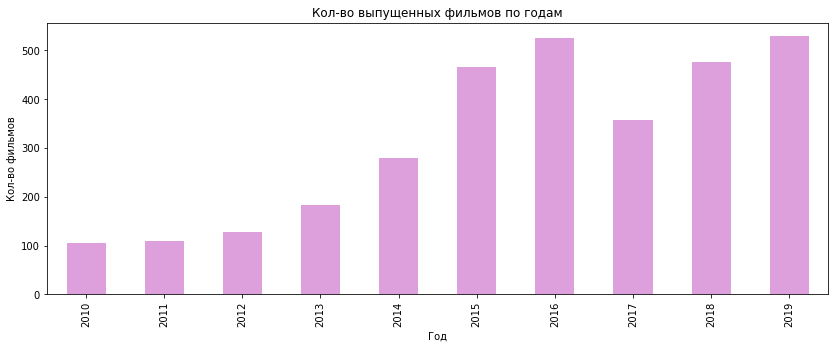

In [31]:
pivot_t.plot(y='count',kind='bar',xlabel ="Год", figsize=(14, 5), color=['plum'],
                   ylabel = "Кол-во фильмов", title ='Кол-во выпущенных фильмов по годам',legend=None)

Максимальное количество фильмов было в прокате 2019 году, минимальное - в 2010.

<AxesSubplot:title={'center':'Суммы сборов кинопроката по годам'}, ylabel='Год'>

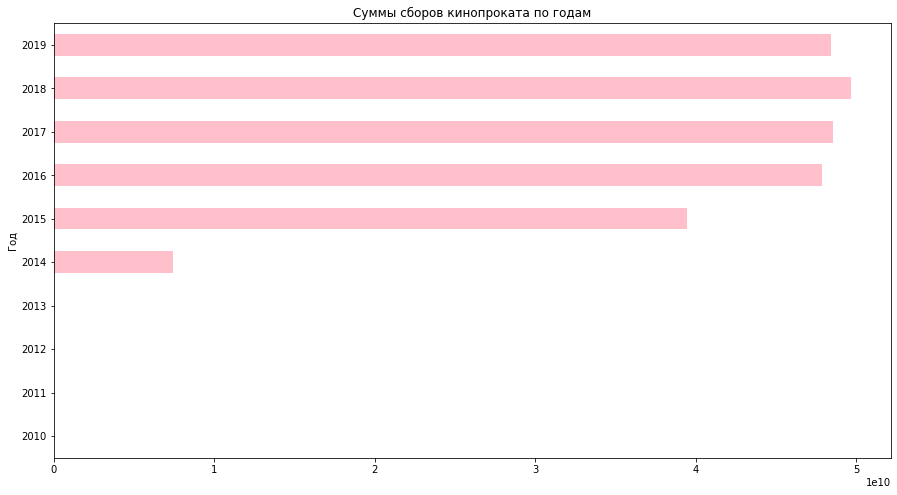

In [32]:
pivot_t.plot(y='sum',kind='barh', figsize=(15, 8), xlabel ="Год", color='pink',
             ylabel = "Сумма сборов", title ='Суммы сборов кинопроката по годам',legend=None)

Максимальная сумма сборов была в 2018 году, минимальная - в 2010.

In [33]:
pivot_t

,count,sum,mean,median
year,,,,
2010,105,2.428654e+06,2.313004e+04,1700.000
2011,109,1.410276e+07,1.293832e+05,3000.000
2012,128,6.955423e+06,5.433924e+04,5660.000
2013,184,2.979971e+07,1.619549e+05,3522.500
2014,279,7.444952e+09,2.668442e+07,18160.000
2015,465,3.949737e+10,8.494057e+07,4920933.000
2016,526,4.786630e+10,9.100057e+07,3846679.410
2017,357,4.856371e+10,1.360328e+08,9968340.000
2018,475,4.966840e+10,1.045651e+08,8891102.210


age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
year,,,,,
2010,1.887611e+06,1.201460e+05,3.665120e+05,5.438500e+04,NaN
2011,1.349987e+07,2.198910e+05,3.815130e+05,1.040000e+03,4.500000e+02
2012,2.266483e+06,1.087340e+05,3.254216e+06,1.825800e+05,1.143410e+06
2013,2.710302e+06,2.091034e+07,6.580696e+05,5.161246e+06,3.597520e+05
2014,3.755623e+08,2.584782e+09,5.442801e+08,2.209713e+09,1.730614e+09
2015,3.790546e+08,1.361608e+10,1.136812e+10,5.432308e+09,8.701799e+09
2016,1.502288e+08,1.220445e+10,1.666455e+10,6.793930e+09,1.205315e+10
2017,2.295989e+08,7.851428e+09,1.874504e+10,9.651496e+09,1.208614e+10
2018,3.244900e+07,1.426729e+10,1.650360e+10,8.760086e+09,1.010497e+10


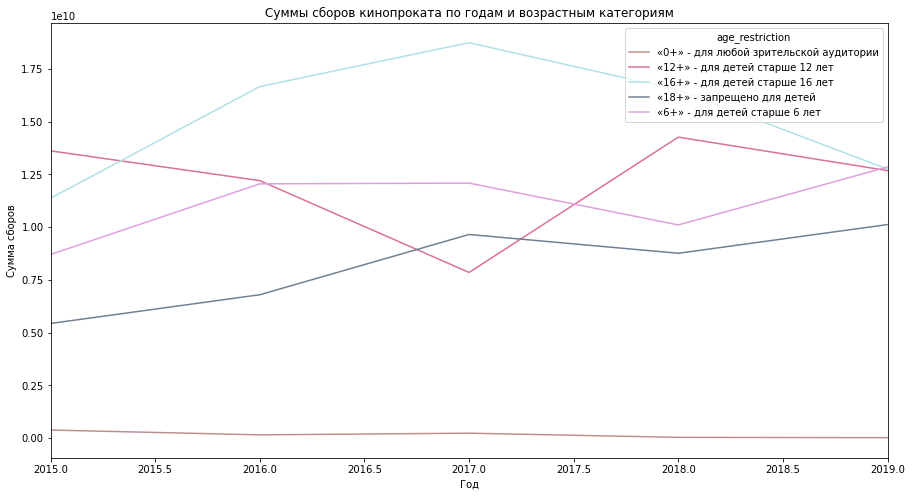

In [34]:
age_table=pivot_data.pivot_table(index='year',columns='age_restriction', values='box_office',aggfunc='sum')
age_table.plot(kind='line', xlim=[2015,2019], figsize=(15, 8), xlabel ="Год", color=['rosybrown',
               'palevioletred','powderblue','slategrey','plum'],
             ylabel = "Сумма сборов", title ='Суммы сборов кинопроката по годам и возрастным категориям')
age_table


Большую часть периода самые крупные суммы собирали фильмы с возрастной категорией 16+, меньше всего фильмы с категорией 0+. Сборы остальных возрастных категорий колебались от года к году, к концу периода, в 2019 фильмы в  категориях 16+, 12+ и 6+ собрали практически идентичный объем средств. Скорее всего такая динамика связана с тем, что у фильмов с более высоким возрастным рейтингом более платежеспособная аудитория, на фильмы категорий 6+ и 0+ ходят в основном семьи с детьми, заинтересованы в них больше дети, но принятие решения о покупке билета в конечном итоге лежит на родителях. Аудитория фильмов, начиная с 12+, более самостоятельная и независимая, им проще решиться пойти в кино. 

In [35]:
print('Сборы по категориям в млрд')
round(age_table.sum()/1000000000)

Сборы по категориям в млрд


age_restriction
«0+» - для любой зрительской аудитории     1.0
«12+» - для детей старше 12 лет           63.0
«16+» - для детей старше 16 лет           77.0
«18+» - запрещено для детей               43.0
«6+» - для детей старше 6 лет             58.0
dtype: float64

### Исследование фильмов, которые получили государственную поддержку


In [36]:
supported_films=data.loc[(data['nonrefundable_support'].notna()) | (data['refundable_support'].notna())].copy()
supported_films['support_budget']=supported_films['nonrefundable_support'] + supported_films['nonrefundable_support']
support_table_1=supported_films.pivot_table(index='year', values='support_budget',aggfunc=['count', 'sum', 'mean'])
support_table_1

,count,sum,mean
,support_budget,support_budget,support_budget
year,,,
2013,2,2.686959e+08,1.343479e+08
2014,16,1.002005e+09,6.262529e+07
2015,86,6.038177e+09,7.021136e+07
2016,61,6.763311e+09,1.108740e+08
2017,41,4.929250e+09,1.202256e+08
2018,56,5.569939e+09,9.946320e+07
2019,70,7.952000e+09,1.136000e+08


In [37]:
support_table_1.describe()

,count,sum,mean
,support_budget,support_budget,support_budget
count,7.000000,7.000000e+00,7.000000e+00
mean,47.428571,4.646197e+09,1.016210e+08
std,29.854409,2.907582e+09,2.632548e+07
min,2.000000,2.686959e+08,6.262529e+07
25%,28.500000,2.965627e+09,8.483728e+07
50%,56.000000,5.569939e+09,1.108740e+08
75%,65.500000,6.400744e+09,1.169128e+08
max,86.000000,7.952000e+09,1.343479e+08


<AxesSubplot:title={'center':'Кол-во фильмов с гос. поддержкой по годам'}, xlabel='Год', ylabel='Кол-во фильмов'>

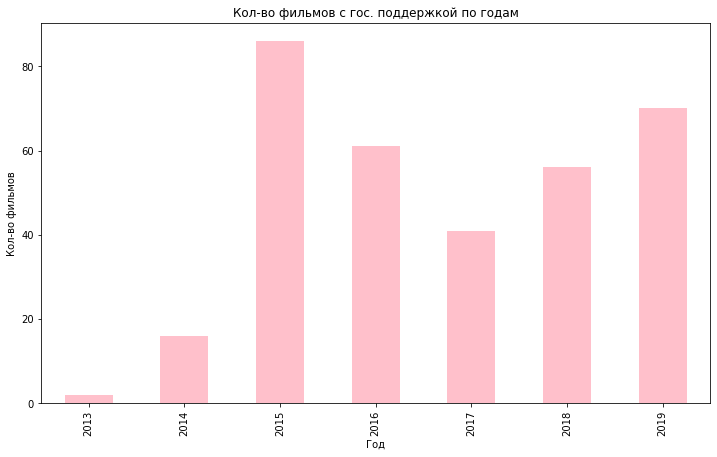

In [38]:
support_table_1.plot(kind='bar', y='count', figsize=(12, 7), color='pink', xlabel ="Год", 
             ylabel = "Кол-во фильмов", title ='Кол-во фильмов с гос. поддержкой по годам',legend=None)

<AxesSubplot:title={'center':'Суммы гос. поддержки кинопроката по годам'}, xlabel='Год', ylabel='Сумма гос. поддержки'>

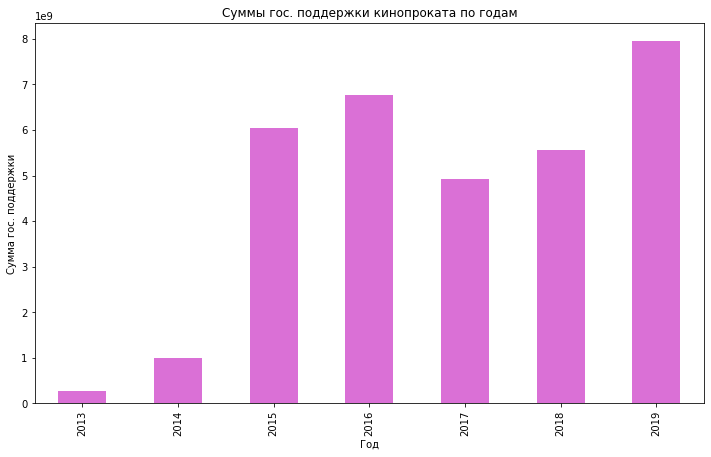

In [39]:
support_table_1.plot(kind='bar', y='sum', figsize=(12, 7), color='orchid', xlabel ="Год", 
             ylabel = "Сумма гос. поддержки", title ='Суммы гос. поддержки кинопроката по годам',legend=None)

<AxesSubplot:title={'center':'Средняя гос. поддержка кинопроката по годам'}, xlabel='Год', ylabel='Средняя сумма гос. поддержки'>

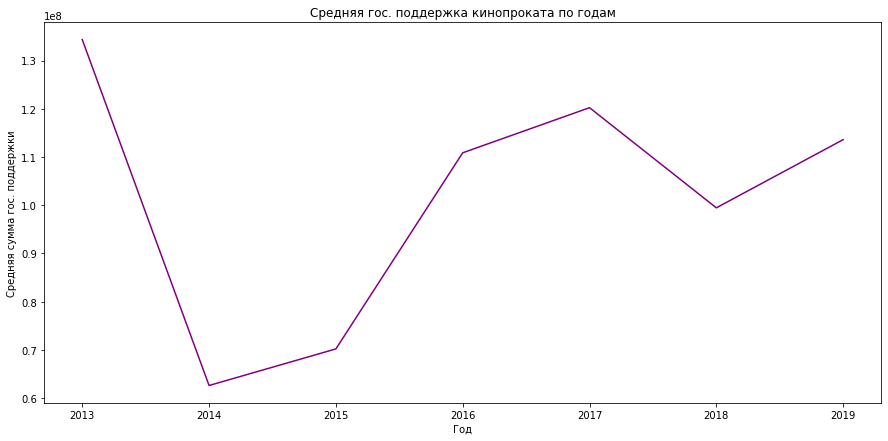

In [40]:
support_table_1.plot(kind='line', y='mean', figsize=(15, 7),color='purple', xlabel ="Год", 
             ylabel = "Средняя сумма гос. поддержки", title ='Средняя гос. поддержка кинопроката по годам',legend=None)

Максимальное число фильмов с гос. поддержкой было выпущено в прокат в 2015 году. При этом в этом году средний размер поддержки из расчета на фильм был вторым с конца, меньшие суммы на фильм в среднем выделялись на фильмы, выпущенные в 2014 году.
Суммарно больше всего денег было выделено на фильмы, вышедшие в прокат в 2019 году. В целом в последние 3 года рассматриваемого периода виднеется тренд на выделение больших сумм на поддержку кино  и в сумме средств в общем и в количестве фильмов.

In [41]:
support_table_2=supported_films.pivot_table(index='year', values='ratings',aggfunc=['mean'])
support_table_2

,mean
,ratings
year,
2013,6.700000
2014,6.006667
2015,6.139759
2016,5.677193
2017,6.000000
2018,6.001887
2019,6.176119


In [42]:
print('Средний рейтинг фильма с гос. поддержкой:',support_table_2.mean())

Средний рейтинг фильма с гос. поддержкой: mean  ratings    6.100232
dtype: float64


Рейтинги фильмов с гос. поддержкой в рассматриваемом периоде значительно не менялся от года к году, сильнее всего он упал примерно на 0.7 между 2013 и 2014 годами, дальше изменения были менее масштабными и в среднем рейтинг держался около отметки в 6,1.

<AxesSubplot:title={'center':'Суммы гос. поддержки кинопроката по жанрам'}, ylabel='Жанр'>

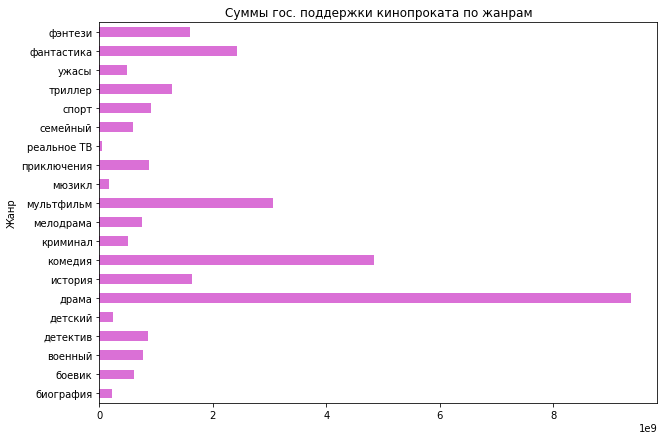

In [43]:
support_table_3=supported_films.pivot_table(index='main_genre', values='support_budget',aggfunc=['sum','mean'])
support_table_3.columns = ['sum','mean']
support_table_3.plot(kind='barh', y='sum', figsize=(10, 7),color='orchid', 
             xlabel = "Жанр", title ='Суммы гос. поддержки кинопроката по жанрам',legend=None)


<AxesSubplot:title={'center':'Средний объем гос. поддержки по жанрам'}, ylabel='Жанр'>

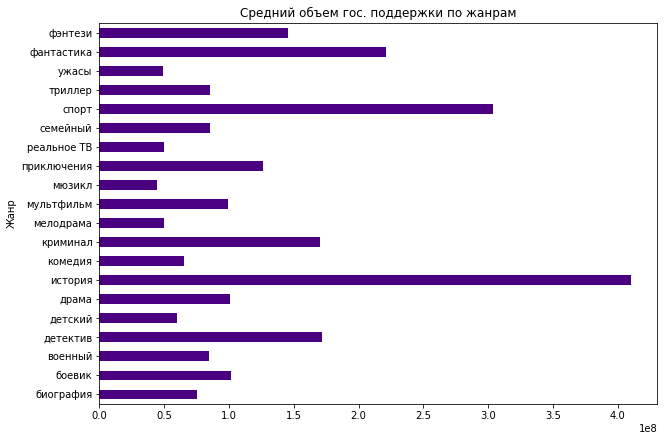

In [44]:
support_table_3.plot(kind='barh', y='mean', figsize=(10, 7),color='indigo',  
             xlabel = "Жанр", title ='Средний объем гос. поддержки по жанрам',legend=None)

In [45]:
support_table_4=supported_films.pivot_table(index='year',columns='main_genre', values='box_office',aggfunc='sum')
support_table_4

main_genre,биография,боевик,военный,детектив,детский,драма,история,комедия,криминал,мелодрама,мультфильм,мюзикл,приключения,реальное ТВ,семейный,спорт,триллер,ужасы,фантастика,фэнтези
year,,,,,,,,,,,,,,,,,,,,
2013,NaN,NaN,NaN,NaN,NaN,3.653536e+05,NaN,1.995703e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,9.648820e+07,NaN,3.996224e+08,NaN,10788267.10,3.134898e+08,NaN,NaN,NaN,1.534704e+08,NaN,NaN,NaN,4.353485e+07,NaN
2015,4.018045e+08,2.295780e+08,3.530010e+07,72618367.4,1038520.0,1.215550e+09,NaN,1.498941e+09,NaN,11273400.20,1.327676e+09,20274378.16,NaN,NaN,NaN,1.686889e+08,3.700961e+08,3.106680e+08,3.347500e+05,1.102294e+08
2016,NaN,NaN,4.153278e+08,NaN,1975132.0,2.382826e+09,NaN,9.574890e+08,228578204.0,22947520.00,2.292630e+08,81430626.82,4.351320e+05,NaN,3.106459e+08,1.939338e+07,7.393417e+07,2.131833e+08,1.048125e+09,8.397881e+07
2017,NaN,NaN,8.667192e+06,NaN,0.0,1.138982e+09,5.904051e+08,3.391506e+09,11215659.0,270497.00,1.485720e+09,NaN,6.710457e+08,NaN,NaN,2.779686e+09,7.189790e+06,NaN,2.620403e+08,5.117755e+08
2018,9.884130e+05,5.716499e+07,5.583754e+08,8425367.6,NaN,3.840756e+09,NaN,2.199490e+09,NaN,7062395.93,1.052855e+09,NaN,9.575509e+07,NaN,NaN,NaN,2.257233e+08,4.645115e+07,2.918658e+08,1.008747e+08
2019,1.140902e+08,3.091860e+08,NaN,57503776.4,NaN,8.158756e+08,8.650632e+08,4.012972e+09,NaN,2446886.00,1.213011e+09,NaN,4.383610e+08,32721103.43,1.203084e+08,NaN,2.350688e+07,1.398208e+08,7.230379e+07,1.889782e+08


Суммарно больше всего средств в этот период выделялось на драмы, комедии и мультфильмы, скорее всего самые популярные жанры кино. При этом средний объем поддержки выше всего у исторических фильмов, фильмов про спорт и фанстастических. Я полагаю, что это связанно с трудозатратностью и высокой стоимостью, например, на воссоздание исторических событий или спецэффекты.
Также интересно, что не на каждый жанр госудаство ежегодно оказывало поддержку, ежегодно поддерживались драмы и комедии, реже всего реальное ТВ, мюзиклы, криминал, детское кино и высокозатратное историческое кино.

In [46]:
supported_films['payback']=supported_films['box_office']/supported_films['budget']
support_table_5=supported_films.pivot_table(index='year', values=['box_office','budget','payback'],aggfunc=['mean'])
support_table_5.columns = ['box_office','budget','payback']
support_table_5.sort_values(by=['payback'],ascending=False)

,box_office,budget,payback
year,,,
2018,1.773941e+08,1.289288e+08,1.117890
2017,2.785917e+08,1.734293e+08,1.009244
2019,1.401605e+08,1.833715e+08,0.871802
2016,1.013618e+08,1.272107e+08,0.647648
2014,6.358889e+07,8.230886e+07,0.603401
2015,6.806218e+07,9.312004e+07,0.553284
2013,1.016119e+07,1.277177e+08,0.058989


In [47]:
support_table_6=supported_films.pivot_table(index='main_genre', values=['box_office','budget','payback'],aggfunc=['mean'])
support_table_6.columns = ['box_office','budget','payback']
support_table_6.sort_values(by=['payback'],ascending=False)

,box_office,budget,payback
main_genre,,,
спорт,9.892561e+08,2.368230e+08,2.408273
комедия,1.709586e+08,8.511216e+07,1.487506
биография,1.722943e+08,1.763112e+08,1.136724
ужасы,7.101232e+07,5.638776e+07,1.050834
мультфильм,1.874005e+08,1.983432e+08,0.952609
военный,1.130745e+08,1.428785e+08,0.857312
семейный,9.740412e+07,9.097140e+07,0.752485
боевик,9.932149e+07,1.222870e+08,0.745657
фантастика,1.718204e+08,2.363856e+08,0.604101


В среднем в последние 3 года периода фильмы с гос. поддержкой стали лучше окупаться, в 2017 и 2018 году они даже давали прибыль. При этом наиболее окупаемыми жанрами стали спортивное кино, комедии, биогравии и фильмы ужасов.

,sum,mean
age_restriction,,
«6+» - для детей старше 6 лет,8.174748e+09,1.257654e+08
«12+» - для детей старше 12 лет,1.246379e+10,1.175829e+08
«16+» - для детей старше 16 лет,9.467800e+09,7.574240e+07
«18+» - запрещено для детей,1.960000e+09,7.000000e+07
«0+» - для любой зрительской аудитории,4.570400e+08,5.713000e+07


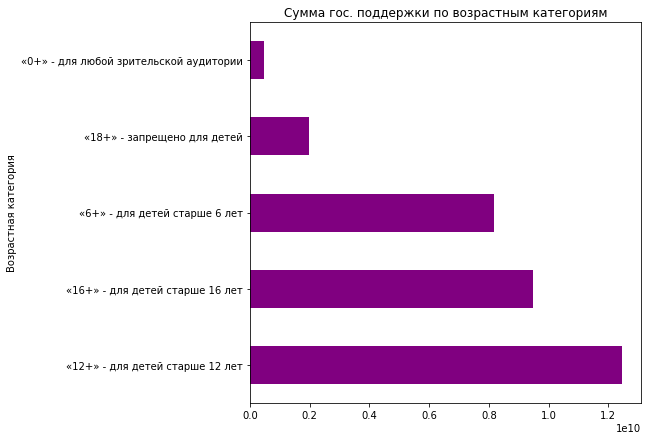

In [48]:
support_table_7=supported_films.pivot_table(index='age_restriction', values=['support_budget'],aggfunc=['sum','mean'])
support_table_7.columns = ['sum','mean']
support_table_7.sort_values(by=['sum'],ascending=False).plot(kind='barh', y='sum', figsize=(7, 7), color='purple', 
                             xlabel ="Возрастная категория", title ='Сумма гос. поддержки по возрастным категориям',legend=None)
support_table_7.sort_values(by=['mean'],ascending=False)

Больше всего гос. поддержки выделялось на фильмы с возрастной категорией 12+, видимо с целью показа их достаточно широкой аудитории. На последнем месте по поддержке находятся фильмы с ограничением 0+, возможно это связанно с низкой окупаемостью детского кино, а также редкими вложениями в него.

In [49]:
support_table_8=supported_films.pivot_table(index='age_restriction', values=['box_office','budget','payback'],aggfunc=['mean'])
support_table_8.columns = ['box_office','budget','payback']
support_table_8.sort_values(by=['payback'],ascending=False)

,box_office,budget,payback
age_restriction,,,
«12+» - для детей старше 12 лет,1.995796e+08,1.490485e+08,1.037290
«6+» - для детей старше 6 лет,2.059076e+08,2.063133e+08,0.868549
«16+» - для детей старше 16 лет,6.382052e+07,9.638209e+07,0.673161
«0+» - для любой зрительской аудитории,1.105866e+08,1.128731e+08,0.441742
«18+» - запрещено для детей,2.000567e+07,8.381866e+07,0.241361


### Выводы

К сожалению, только 42% фильмов имели данные о прокате, так что выводы о коммерческом успехе тех или иных жанров, режиссеров и пр. можно делать меньше, чем по половине собранных данных.
Несмотря на это, из имеющихся данных удалось выявить следующее:


1. Максимальная сумма сборов кинопроката была в 2019 году, минимальная - в 2010. При этом сборы фильмов с разными возрастными ограничениями колебались на протяжении рассматриваемого периода, самой кассовой за эти годы является категория 16+, наименее востребованы фильмы с ограничением 0+.


2. Максимальное число фильмов с гос. поддержкой было выпущено в прокат в 2015 году. В целом в последние 3 года рассматриваемого периода виднеется тренд на выделение больших сумм на поддержку кино и в сумме средств в общем и в количестве фильмов.

3. Рейтинги фильмов с гос. поддержкой в среднем держались около отметки в 6,1  и сильно не менялись в течение рассматриваемого периода.

4. Суммарно больше всего средств выделялось на драмы, комедии и мультфильмы. При этом средний объем поддержки выше всего у исторических фильмов, фильмов про спорт и фанстастических. Ежегодно поддерживались драмы и комедии, реже всего реальное ТВ.

5. В среднем в последние 3 года рассматриваемого периода фильмы с гос. поддержкой стали лучше окупаться, в 2017 и 2018 году они приносили прибыль. Лучше всего окупались: спортивное кино, комедии, биографии и фильмы ужасов.

6. Больше всего гос. поддержки выделялось на фильмы с возрастной категорией 12+, видимо с целью показа их достаточно широкой аудитории, именно эти фильмы и лидируют по окупаемости  среди поддержанных государством. На последнем месте по поддержке находятся фильмы с ограничением 0+, по окупаемости они вторые с конца, после категории 18+.

Таким образом, изучив данные о гос. поддержке кино за период 2013-2019 г. удалось выявить идеальный для поддержки с точки зрения государства фильм, это комедии с ограничением 12+. 